In [13]:
# Function to get e and H given T in celsius and dewpoint also in celsius

def get_e(td):
    e = 6.11*np.exp(5417.7530*((1/273.16) - 1/(td+273.16)))
    return e

def get_humidex(T,td):
    H = T + (0.5555*(get_e(td) - 10))
    return H

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('default')

In [15]:
data = pd.read_csv("DATA111_V0.csv", encoding='latin-1')

In [16]:
data.head()

,COD,YEAR,DAY365,MINUTE2400,N_WNDVEL_5M,N_WNDVEL_2M,N_WNDDIR_DEGREE,N_INCRAD_10MSR,N_REFRAD_10MSR,N_PHTFLOW_10MSR,...,N_AIRMTR_PCT10,N_AIRTMP_MED10,N_GRDTMP_3CM,N_GRDTMP_6CM,N_GRDTMP_UV,N_PRESSION_HPA,N_RAIN_SUM10,month,week,C_WNDDIR_DEGREE
0,111.0,1997.0,1.0,10.0,1618.00,1115.000,8.32,0.0,0.0,0.0,...,92.3,19.84,21.04,22.68,24.59,943.0,0.0,1,0.0,N
1,111.0,1997.0,1.0,20.0,0.99,0.763,20.59,0.0,0.0,0.0,...,93.1,19.63,20.97,22.65,24.52,943.0,0.0,1,0.0,NNE
2,111.0,1997.0,1.0,30.0,2.05,1115.000,17.72,0.0,0.0,0.0,...,93.9,19.42,20.88,22.51,24.38,943.0,0.0,1,0.0,NNE
3,111.0,1997.0,1.0,40.0,3089.00,1422.000,189.20,0.0,0.0,0.0,...,94.4,19.42,20.79,22.43,24.30,943.0,0.0,1,0.0,S
4,111.0,1997.0,1.0,50.0,2128.00,1406.000,153.20,0.0,0.0,0.0,...,94.0,19.41,20.69,22.28,24.24,943.0,0.0,1,0.0,SSE


In [17]:
# getting Tdew for max,mean and min temperatures all of them with the relative humidty of the day
def get_td(t,hr):
    td = t - (100-hr)/5
    return td

data['td1'] = get_td(data['N_AIRTMP_MED10'],data['N_AIRMTR_PCT10'])

In [18]:
data['h1'] = get_humidex(data['N_AIRTMP_MED10'],data['td1'])

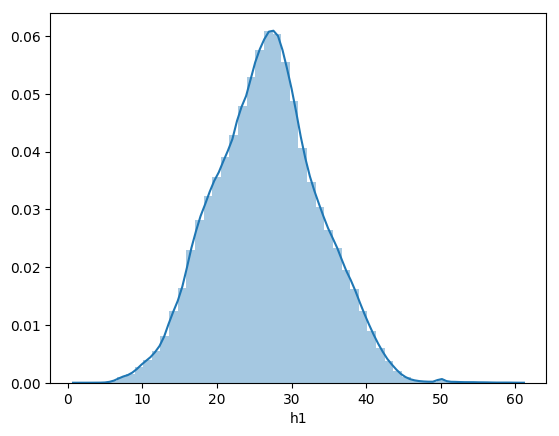

In [19]:
data.loc[data['h1'] > 60 , 'h1'] = 50
sns.distplot(data['h1'])

In [20]:
data[(data['h1'] <40)&(data['h1'] >= 35)]

,COD,YEAR,DAY365,MINUTE2400,N_WNDVEL_5M,N_WNDVEL_2M,N_WNDDIR_DEGREE,N_INCRAD_10MSR,N_REFRAD_10MSR,N_PHTFLOW_10MSR,...,N_GRDTMP_3CM,N_GRDTMP_6CM,N_GRDTMP_UV,N_PRESSION_HPA,N_RAIN_SUM10,month,week,C_WNDDIR_DEGREE,td1,h1
53,111.0,1997.0,1.0,1110.0,1363.000,1269.000,17.290,5862.000,1218.000,577.4,...,29.40,27.27,25.430,943.0,0.0,1,0.0,NNE,21.740,36.171085
54,111.0,1997.0,1.0,1120.0,1775.000,0.978,16.450,4919.000,0.953,656.0,...,29.84,27.58,25.600,944.0,0.0,1,0.0,NNE,21.200,35.725703
55,111.0,1997.0,1.0,1130.0,2422.000,0.978,175.800,5485.000,1096.000,652.7,...,30.10,27.89,25.770,944.0,0.0,1,0.0,S,21.430,35.660659
56,111.0,1997.0,1.0,1140.0,2226.000,1651.000,14.540,6.040,1248.000,662.8,...,30.59,28.11,25.950,944.0,0.0,1,0.0,NNE,21.460,35.977586
57,111.0,1997.0,1.0,1150.0,1167.000,1452.000,96.600,7.120,1551.000,718.0,...,31.15,28.45,26.100,943.0,0.0,1,0.0,E,20.526,36.160021
58,111.0,1997.0,1.0,1200.0,2265.000,1376.000,73.700,6053.000,1279.000,832.0,...,31.76,28.75,26.270,943.0,0.0,1,0.0,ENE,20.782,35.459882
59,111.0,1997.0,1.0,1210.0,1814.000,1054.000,103.300,6088.000,1261.000,847.0,...,32.03,29.20,26.540,943.0,0.0,1,0.0,ESE,21.296,36.740931
60,111.0,1997.0,1.0,1220.0,1422.000,1804.000,75.500,6937.000,1434.000,838.0,...,32.48,29.47,26.760,942.0,0.0,1,0.0,ENE,20.902,36.254031
61,111.0,1997.0,1.0,1230.0,1461.000,1115.000,8.970,6783.000,1414.000,890.0,...,32.88,29.92,26.990,943.0,0.0,1,0.0,N,22.100,38.572855
62,111.0,1997.0,1.0,1240.0,2403.000,1115.000,168.200,7.970,1757.000,924.0,...,33.47,30.24,27.170,942.0,0.0,1,0.0,SSE,21.710,37.993735


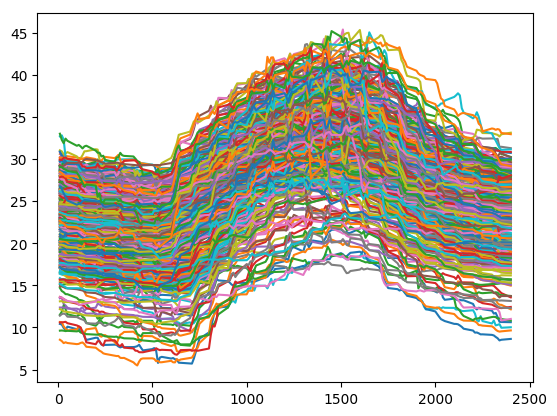

In [21]:
# Example 1 dia

year = 2018
day = 133

for i in data[data.YEAR == year]['DAY365'].unique():
    example = data[(data['YEAR'] == year) & (data['DAY365'] == i)]

    plt.plot(example['MINUTE2400'], example['h1'])

plt.show()

In [22]:
from mpl_toolkits import mplot3d

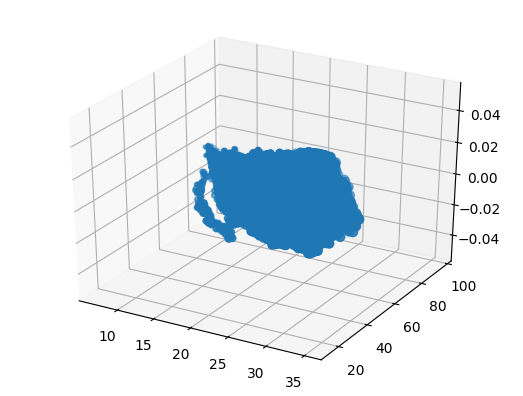

In [23]:
year = 2018
example = data[(data['YEAR'] == year) ]

fig = plt.figure()
ax = plt.axes(projection='3d')

plt.scatter(example['N_AIRTMP_MED10'],example['N_AIRMTR_PCT10'],example['h1'])